In [9]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt


In [10]:
module_path = Path("/home/bbc8731/HSV/3_module_expansion/data/categories_methods/")
seed_path = Path("/home/bbc8731/HSV/2_seed_gene_refinement/data/categories/")
output_file = "/home/bbc8731/HSV/3_module_expansion/data/"

module_dirs = sorted(p for p in module_path.glob("*/") if p.name.startswith(("BP_", "CC_")))
seed_dirs = sorted(p for p in seed_path.glob("*/") if p.name.startswith(("BP", "CC")))
seed_dirs

[PosixPath('/home/bbc8731/HSV/2_seed_gene_refinement/data/categories/BP'),
 PosixPath('/home/bbc8731/HSV/2_seed_gene_refinement/data/categories/CC')]

In [11]:
module_gene_count = [] 

for i in module_dirs:
    df = pd.read_csv(i/"consensus" / "uniprot_ppi.tsv", sep="\t")
    genes = df.loc[df['n_methods'] >=4, 'gene'].tolist()
    category = " ".join(i.name.split("_")[1:])
    module_gene_count.append([category, len(genes)])

module_gene_count = pd.DataFrame(module_gene_count, columns=["category", "No. module genes"])

In [12]:
seed_gene_count = [] 
seed_dirs = sorted(p for p in seed_path.glob("*/") if p.name.startswith(("BP", "CC")))

for i in seed_dirs:
    files_path = list(i.rglob("*.csv"))
    for file in files_path:
        genes = pd.read_csv(file, sep=",")
        category = " ".join(file.name.split(".")[0].split("_"))
        seed_gene_count.append([category, len(genes)])

seed_gene_count = pd.DataFrame(seed_gene_count, columns=["category", "No. seed genes"])

In [13]:
df = seed_gene_count.merge(module_gene_count, on = 'category')


In [15]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 8))
ax = fig.add_axes([0, 0, 1, 1])  # full canvas
ax.axis("off")

table = ax.table(
    cellText=df.values,
    colLabels=["category", "No. seed genes", "No. module genes"],
    cellLoc="center",
    bbox=[0, 0, 1, 1]  # make table fill entire axes
)

table.auto_set_font_size(False)
table.set_fontsize(14)

# Optional: scale rows/columns to fill better
table.scale(1.2, 1.8)

# Styling
for (row, col), cell in table.get_celld().items():
    cell.set_edgecolor("black")
    cell.set_linewidth(1)

    if row == 0:  # header
        cell.set_text_props(weight="bold", color="white")
        cell.set_facecolor("#2E6F95")
    else:
        if row % 2 == 0:
            cell.set_facecolor("#F5F5F5")  # very light gray
        else:
            cell.set_facecolor("white")

# plt.show()

plt.savefig(
    f"{output_file}/N_modules_seeds.pdf",
    format="pdf",
    bbox_inches="tight",
    pad_inches=0
)

plt.close()


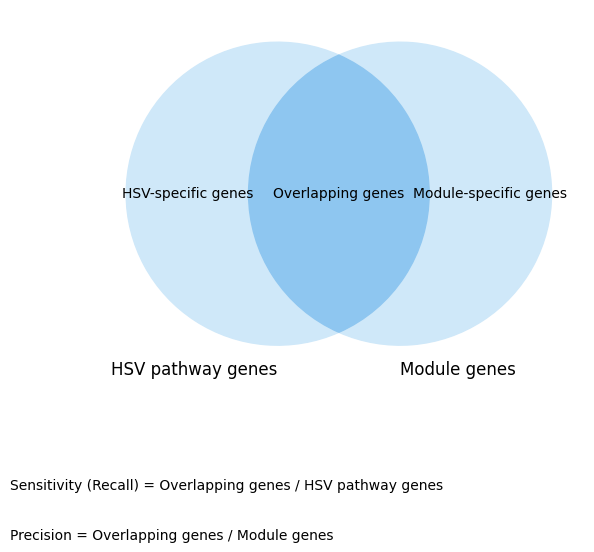

In [22]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

fig, ax = plt.subplots(figsize=(6, 6))

v = venn2(
    subsets=(1, 1, 1),  # dummy equal sizes
    set_labels=("HSV pathway genes", "Module genes")
)

# Remove numbers
for text in v.subset_labels:
    if text:
        text.set_text("")

# Add conceptual labels
v.get_label_by_id("10").set_text("HSV-specific genes")
v.get_label_by_id("01").set_text("Module-specific genes")
v.get_label_by_id("11").set_text("Overlapping genes")

# Colors
# Softer colors
v.get_patch_by_id("10").set_color("#CFE8F9")  # very light blue
v.get_patch_by_id("01").set_color("#CFE8F9")  # very light blue
v.get_patch_by_id("11").set_color("#8EC6F0")  # slightly darker blue

# Keep full opacity
for patch in v.patches:
    if patch:
        patch.set_alpha(1)



# Add definitions below
plt.text(-1.0, -0.9,
         "Sensitivity (Recall) = Overlapping genes / HSV pathway genes",
         fontsize=10)

plt.text(-1.0, -1.05,
         "Precision = Overlapping genes / Module genes",
         fontsize=10)

plt.title("")

plt.tight_layout()
plt.savefig(f"{output_file}/venn_sensitivity_precision.pdf", format="pdf")
plt.show()
